# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [119]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [32]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [38]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [69]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("studentnetwork_download.xlsx")
data.head()

,1. 경영학부 09학번 이정섭,2. 경영학부 10학번 장영호,3. 경영학부 10학번 박성수,4. 경영학부 10학번 김민성,5. 경영학부 10학번 원종벽,6. 경영학부 11학번 오한수,7. 경영학부 11학번 이일훈,8. 경영학부 11학번 백지연,9. 경영학부 12학번 김윤재,10. 경영학부 12학번 전진우,...,41. 경영학부 16학번 이재훈,42. 경영학부 16학번 마효설,43. 경영학부 16학번 이율리야,44.영문학과 10학번 장은진,45. 정보사회학과 10학번 나지은,46. 정보사회학과 12학번 모성훈,47. 정보사회학과 14학번 송현아,48. 중국학과 13학번 배현아,49. 중국학과 13학번 이한샘,50. 언론정보 홍보전공 14학번 나영애
강지민,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
구영모,NaN,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
김현수,NaN,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
나지은,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-,1,1,0,0,0
김윤재,NaN,0,1,0,1,0,0,0,-,1,...,0,0,0,0,0,1,0,0,0,0


In [70]:
# 설문에 참여를 참여를 안 한 열을 제거함.
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

,2. 경영학부 10학번 장영호,3. 경영학부 10학번 박성수,4. 경영학부 10학번 김민성,5. 경영학부 10학번 원종벽,6. 경영학부 11학번 오한수,7. 경영학부 11학번 이일훈,8. 경영학부 11학번 백지연,9. 경영학부 12학번 김윤재,10. 경영학부 12학번 전진우,11. 경영학부 12학번 정진수,...,41. 경영학부 16학번 이재훈,42. 경영학부 16학번 마효설,43. 경영학부 16학번 이율리야,44.영문학과 10학번 장은진,45. 정보사회학과 10학번 나지은,46. 정보사회학과 12학번 모성훈,47. 정보사회학과 14학번 송현아,48. 중국학과 13학번 배현아,49. 중국학과 13학번 이한샘,50. 언론정보 홍보전공 14학번 나영애
강지민,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
구영모,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
김현수,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
나지은,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-,1,1,0,0,0
김윤재,0,1,0,1,0,0,0,-,1,1,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

Index(['2. 경영학부 10학번 장영호', '3. 경영학부 10학번 박성수', '4. 경영학부 10학번 김민성',
       '5. 경영학부 10학번 원종벽', '6. 경영학부 11학번 오한수', '7. 경영학부 11학번 이일훈',
       '8. 경영학부 11학번 백지연', '9. 경영학부 12학번 김윤재', '10. 경영학부 12학번 전진우',
       '11. 경영학부 12학번 정진수', '12. 경영학부 12학번 구영모', '13. 경영학부 12학번 최용희',
       '14. 경영학부 12학번 최원준', '15. 경영학부 12학번 최제림', '16. 경영학부 12학번 권용우',
       '17. 경영학부 12학번 임수빈', '18. 경영학부 13학번 박소현', '19. 경영학부 13학번 박홍규',
       '20. 경영학부 13학번 김대준', '21. 경영학부 13학번 한솔', '22. 경영학부 13학번 임봉환',
       '23. 경영학부 13학번 정정민', '24. 경영학부 13학번 김현수', '25. 경영학부 14학번 김영인',
       '26. 경영학부 14학번 김유경', '27. 경영학부 14학번 김효원', '28. 경영학부 14학번 박다운',
       '29. 경영학부 14학번 박현성', '30. 경영학부 14학번 안진성', '31. 경영학부 14학번 윤여주',
       '32. 경영학부 14학번 이동성', '33. 경영학부 14학번 이소연', '34. 경영학부 14학번 이주영',
       '35. 경영학부 15학번 비가남', '36. 경영학부 16학번 강지민', '37. 경영학부 16학번 권성민',
       '38. 경영학부 16학번 김선현', '39. 경영학부 16학번 박진우', '40. 경영학부 16학번 윤일호',
       '41. 경영학부 16학번 이재훈', '42. 경영학부 16학번 마효설', '43. 경영학부 16학번 이율리야',
       '44.영문학과 10학번 장은진', '

In [72]:
data.columns[0].split()

['2.', '경영학부', '10학번', '장영호']

In [81]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['장영호', '박성수', '김민성', '원종벽', '오한수']

In [82]:
data.columns = column_list
data.head()

,장영호,박성수,김민성,원종벽,오한수,이일훈,백지연,김윤재,전진우,정진수,...,이재훈,마효설,이율리야,장은진,나지은,모성훈,송현아,배현아,이한샘,나영애
강지민,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
구영모,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
김현수,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
나지은,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-,1,1,0,0,0
김윤재,0,1,0,1,0,0,0,-,1,1,...,0,0,0,0,0,1,0,0,0,0


In [90]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[('강지민', '박홍규'),
 ('강지민', '한솔'),
 ('강지민', '임봉환'),
 ('강지민', '권성민'),
 ('강지민', '박진우'),
 ('구영모', '백지연'),
 ('구영모', '최용희'),
 ('구영모', '최원준'),
 ('구영모', '최제림'),
 ('구영모', '권용우'),
 ('구영모', '이소연'),
 ('구영모', '마효설'),
 ('구영모', '이율리야'),
 ('김현수', '장영호'),
 ('김현수', '김민성'),
 ('김현수', '안진성'),
 ('나지은', '박현성'),
 ('나지은', '이동성'),
 ('나지은', '모성훈'),
 ('나지은', '송현아'),
 ('김윤재', '박성수'),
 ('김윤재', '원종벽'),
 ('김윤재', '전진우'),
 ('김윤재', '정진수'),
 ('김윤재', '최용희'),
 ('김윤재', '최제림'),
 ('김윤재', '모성훈'),
 ('전진우', '김윤재'),
 ('전진우', '정진수'),
 ('전진우', '최제림'),
 ('전진우', '박현성'),
 ('전진우', '모성훈'),
 ('정진수', '전진우'),
 ('정진수', '모성훈'),
 ('정진수', '나영애'),
 ('박성수', '오한수'),
 ('박성수', '이일훈'),
 ('박성수', '최제림'),
 ('박성수', '임수빈'),
 ('나영애', '정진수'),
 ('나영애', '김대준'),
 ('나영애', '김효원'),
 ('나영애', '박다운'),
 ('나영애', '윤여주'),
 ('나영애', '송현아'),
 ('윤일호', '강지민'),
 ('윤일호', '권성민'),
 ('윤일호', '김선현'),
 ('윤일호', '박진우'),
 ('윤일호', '이재훈'),
 ('윤일호', '이율리야'),
 ('박진우', '강지민'),
 ('박진우', '권성민'),
 ('박진우', '김선현'),
 ('박진우', '윤일호'),
 ('박진우', '이재훈'),
 ('이재훈', '이동성'),
 ('이재훈', '권성민'),
 ('이재훈', '김선현

In [92]:
len(edgelist) # 관계의 수를 확인

309

In [97]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [192]:
# node 확인
G.node

NodeView(('강지민', '박홍규', '한솔', '임봉환', '권성민', '박진우', '구영모', '백지연', '최용희', '최원준', '최제림', '권용우', '이소연', '마효설', '이율리야', '김현수', '장영호', '김민성', '안진성', '나지은', '박현성', '이동성', '모성훈', '송현아', '김윤재', '박성수', '원종벽', '전진우', '정진수', '나영애', '오한수', '이일훈', '임수빈', '김대준', '김효원', '박다운', '윤여주', '윤일호', '김선현', '이재훈', '김유경', '정정민', '김영인', '이주영', '배현아', '이한샘', '이정섭', '장은진 ', '박소현', '장은진', '비가남'))

In [193]:
# edge 확인
G.edges

OutMultiEdgeView([('강지민', '박홍규', 0), ('강지민', '한솔', 0), ('강지민', '임봉환', 0), ('강지민', '권성민', 0), ('강지민', '박진우', 0), ('박홍규', '김윤재', 0), ('박홍규', '최원준', 0), ('박홍규', '임수빈', 0), ('박홍규', '박소현', 0), ('박홍규', '김대준', 0), ('박홍규', '한솔', 0), ('박홍규', '임봉환', 0), ('박홍규', '정정민', 0), ('박홍규', '김영인', 0), ('박홍규', '이주영', 0), ('박홍규', '강지민', 0), ('박홍규', '장은진', 0), ('한솔', '김민성', 0), ('한솔', '구영모', 0), ('한솔', '최원준', 0), ('한솔', '권용우', 0), ('한솔', '김대준', 0), ('한솔', '임봉환', 0), ('한솔', '정정민', 0), ('한솔', '이주영', 0), ('한솔', '강지민', 0), ('한솔', '권성민', 0), ('임봉환', '김민성', 0), ('임봉환', '박홍규', 0), ('임봉환', '김대준', 0), ('임봉환', '한솔', 0), ('임봉환', '정정민', 0), ('임봉환', '김유경', 0), ('임봉환', '이소연', 0), ('임봉환', '강지민', 0), ('임봉환', '권성민', 0), ('권성민', '김대준', 0), ('권성민', '한솔', 0), ('권성민', '임봉환', 0), ('권성민', '정정민', 0), ('권성민', '김유경', 0), ('권성민', '이소연', 0), ('권성민', '강지민', 0), ('권성민', '김선현', 0), ('권성민', '박진우', 0), ('권성민', '이재훈', 0), ('박진우', '강지민', 0), ('박진우', '권성민', 0), ('박진우', '김선현', 0), ('박진우', '윤일호', 0), ('박진우', '이재훈', 0), ('구영모', '백지연', 0), ('구영모', 

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

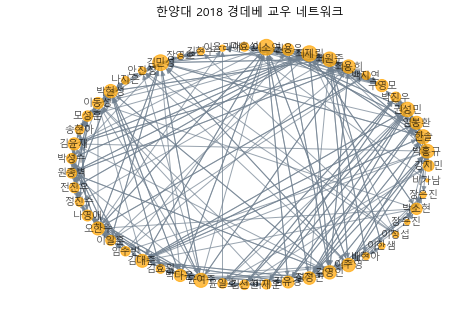

In [240]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

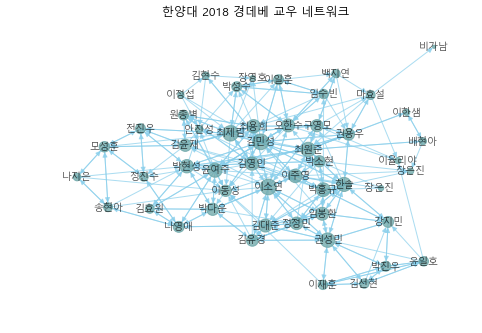

In [241]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [265]:
nx.degree(G)

DiMultiDegreeView({'강지민': 12, '박홍규': 19, '한솔': 20, '임봉환': 17, '권성민': 21, '박진우': 10, '구영모': 15, '백지연': 7, '최용희': 18, '최원준': 21, '최제림': 24, '권용우': 14, '이소연': 25, '마효설': 8, '이율리야': 4, '김현수': 5, '장영호': 3, '김민성': 25, '안진성': 6, '나지은': 6, '박현성': 18, '이동성': 13, '모성훈': 11, '송현아': 8, '김윤재': 15, '박성수': 10, '원종벽': 10, '전진우': 10, '정진수': 8, '나영애': 12, '오한수': 17, '이일훈': 10, '임수빈': 9, '김대준': 17, '김효원': 8, '박다운': 15, '윤여주': 20, '윤일호': 9, '김선현': 9, '이재훈': 9, '김유경': 14, '정정민': 16, '김영인': 18, '이주영': 18, '배현아': 5, '이한샘': 4, '이정섭': 4, '장은진 ': 3, '박소현': 13, '장은진': 4, '비가남': 1})

In [269]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
17,김민성,25
12,이소연,25
10,최제림,24
4,권성민,21
9,최원준,21
36,윤여주,20
2,한솔,20
1,박홍규,19
42,김영인,18
20,박현성,18


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [304]:
nx.degree_centrality(G)

{'강지민': 0.24,
 '구영모': 0.3,
 '권성민': 0.42,
 '권용우': 0.28,
 '김대준': 0.34,
 '김민성': 0.5,
 '김선현': 0.18,
 '김영인': 0.36,
 '김유경': 0.28,
 '김윤재': 0.3,
 '김현수': 0.1,
 '김효원': 0.16,
 '나영애': 0.24,
 '나지은': 0.12,
 '마효설': 0.16,
 '모성훈': 0.22,
 '박다운': 0.3,
 '박성수': 0.2,
 '박소현': 0.26,
 '박진우': 0.2,
 '박현성': 0.36,
 '박홍규': 0.38,
 '배현아': 0.1,
 '백지연': 0.14,
 '비가남': 0.02,
 '송현아': 0.16,
 '안진성': 0.12,
 '오한수': 0.34,
 '원종벽': 0.2,
 '윤여주': 0.4,
 '윤일호': 0.18,
 '이동성': 0.26,
 '이소연': 0.5,
 '이율리야': 0.08,
 '이일훈': 0.2,
 '이재훈': 0.18,
 '이정섭': 0.08,
 '이주영': 0.36,
 '이한샘': 0.08,
 '임봉환': 0.34,
 '임수빈': 0.18,
 '장영호': 0.06,
 '장은진': 0.08,
 '장은진 ': 0.06,
 '전진우': 0.2,
 '정정민': 0.32,
 '정진수': 0.16,
 '최용희': 0.36,
 '최원준': 0.42,
 '최제림': 0.48,
 '한솔': 0.4}

In [296]:
nx.closeness_centrality(G)

{'강지민': 0.33669565217391306,
 '구영모': 0.4163440860215054,
 '권성민': 0.3911111111111111,
 '권용우': 0.4033333333333333,
 '김대준': 0.41191489361702127,
 '김민성': 0.4555294117647059,
 '김선현': 0.27856115107913665,
 '김영인': 0.44,
 '김유경': 0.3687619047619048,
 '김윤재': 0.3991752577319588,
 '김현수': 0.3048818897637795,
 '김효원': 0.33669565217391306,
 '나영애': 0.37960784313725493,
 '나지은': 0.2581333333333333,
 '마효설': 0.3048818897637795,
 '모성훈': 0.3426548672566372,
 '박다운': 0.4163440860215054,
 '박성수': 0.3687619047619048,
 '박소현': 0.3687619047619048,
 '박진우': 0.28681481481481486,
 '박현성': 0.41191489361702127,
 '박홍규': 0.3723076923076923,
 '배현아': 0.30976,
 '백지연': 0.3147967479674797,
 '비가남': 0.2354651162790698,
 '송현아': 0.29333333333333333,
 '안진성': 0.371559633027523,
 '오한수': 0.41191489361702127,
 '원종벽': 0.35522935779816517,
 '윤여주': 0.4163440860215054,
 '윤일호': 0.22,
 '이동성': 0.4939024390243903,
 '이소연': 0.4665060240963856,
 '이율리야': 0.3521739130434783,
 '이일훈': 0.3618691588785047,
 '이재훈': 0.27856115107913665,
 '이정섭': 0.0,
 '이주영':

In [305]:
nx.betweenness_centrality(G)

{'강지민': 0.027640731150935235,
 '구영모': 0.04627565512420508,
 '권성민': 0.10889228643746587,
 '권용우': 0.031853662210805066,
 '김대준': 0.033971913394292,
 '김민성': 0.11081997930420841,
 '김선현': 0.0049297493889330635,
 '김영인': 0.03798664154303992,
 '김유경': 0.009869736612593756,
 '김윤재': 0.032266154562665544,
 '김현수': 0.00013605442176870748,
 '김효원': 0.0006482021379980563,
 '나영애': 0.03865494125078925,
 '나지은': 0.0016783732911737654,
 '마효설': 0.019582604470359574,
 '모성훈': 0.024401890626380426,
 '박다운': 0.022816149610027158,
 '박성수': 0.010524185922682165,
 '박소현': 0.015043947451406985,
 '박진우': 0.008991950226644105,
 '박현성': 0.06004106630803914,
 '박홍규': 0.04431255169101757,
 '배현아': 0.0013887269193391643,
 '백지연': 0.003935374149659864,
 '비가남': 0.0,
 '송현아': 0.009100106456749293,
 '안진성': 0.0,
 '오한수': 0.04149330941167677,
 '원종벽': 0.001508811508996701,
 '윤여주': 0.04685372631903245,
 '윤일호': 0.0019528668610301265,
 '이동성': 0.0,
 '이소연': 0.11082251426734187,
 '이율리야': 0.0,
 '이일훈': 0.007352931648850016,
 '이재훈': 0.0059988605498

## 5. 분석 결과

In [311]:
list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])

[12,
 19,
 20,
 17,
 21,
 10,
 15,
 7,
 18,
 21,
 24,
 14,
 25,
 8,
 4,
 5,
 3,
 25,
 6,
 6,
 18,
 13,
 11,
 8,
 15,
 10,
 10,
 10,
 8,
 12,
 17,
 10,
 9,
 17,
 8,
 15,
 20,
 9,
 9,
 9,
 14,
 16,
 18,
 18,
 5,
 4,
 4,
 3,
 13,
 4,
 1]

In [313]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  51
Number of Edges :  309
Avg. Node Degree :  12.117647058823529
Avg. Path Length :  2.1133333333333333


In [320]:
G.nodes

NodeView(('강지민', '박홍규', '한솔', '임봉환', '권성민', '박진우', '구영모', '백지연', '최용희', '최원준', '최제림', '권용우', '이소연', '마효설', '이율리야', '김현수', '장영호', '김민성', '안진성', '나지은', '박현성', '이동성', '모성훈', '송현아', '김윤재', '박성수', '원종벽', '전진우', '정진수', '나영애', '오한수', '이일훈', '임수빈', '김대준', '김효원', '박다운', '윤여주', '윤일호', '김선현', '이재훈', '김유경', '정정민', '김영인', '이주영', '배현아', '이한샘', '이정섭', '장은진 ', '박소현', '장은진', '비가남'))

In [323]:
G.subgraph('박홍규')

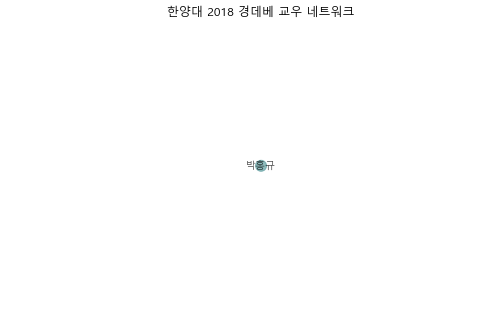

In [324]:
nx.draw_kamada_kawai(G.subgraph('박홍규'), node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 6. 시사점